In [ ]:
# tweet analysis using logistic regression

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data = pd.read_csv('/content/Tweets.csv')

In [ ]:
# Check if there are any missing values
if data.isnull().values.any():
    data.dropna(inplace=True)

In [ ]:
# Define preprocessing functions
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

def clean_text(text):
    # remove unwanted characters and symbols
    text = re.sub(r'[^\w\s]', '', text)
    return text

def lowercase_text(text):
    # convert text to lowercase
    text = text.lower()
    return text

def remove_stopwords(text):
    # remove stopwords
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = ' '.join(filtered_tokens)
    return text

def stem_text(text):
    # apply stemming
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    text = ' '.join(stemmed_tokens)
    return text

def preprocess_text(text):
    text = str(text)
    text = clean_text(text)
    text = lowercase_text(text)
    text = remove_stopwords(text)
    text = stem_text(text)
    return text

In [ ]:
data['text'] = data['selected_text'].apply(preprocess_text)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Create a CountVectorizer object to convert the text data into feature vectors
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data and transform the training and testing data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create a LogisticRegression object and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 80.71324599708879


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

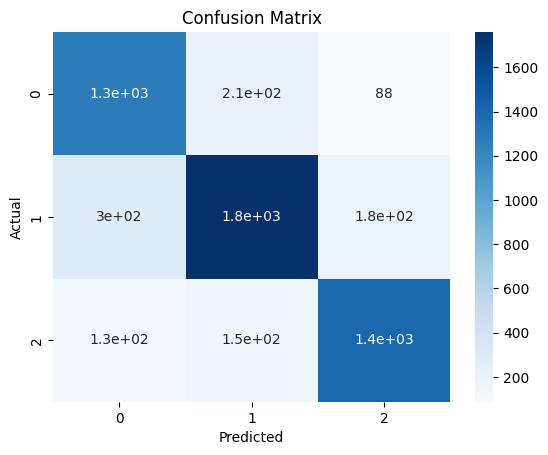

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()